<a href="https://colab.research.google.com/github/saipragathi0912/Student-Performance-Analysis/blob/main/Student_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Students Academic Performance Dataset**: (xAPI-Edu-Data)
<br><br>
Using the above dataset we have first performed a few vizualizations to understand the dataset better. Then appropiate regression models were built, since most of the data was categorical we have used logistic regression as an underlying concept to model the dataset.  

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import (confusion_matrix,accuracy_score)  
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import jaccard_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
students_raw = pd.read_csv('/content/drive/MyDrive/sampledata/xAPI-Edu-Data.csv')
students_raw

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [4]:
students_raw.shape

(480, 17)

In [5]:
# Columns of the dataset
students_raw.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [6]:
# Information
students_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [7]:
# Description of the dataset
students_raw.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [8]:
# Checking for missing values
students_raw.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [9]:
# Checking for duplicate values
duplicate = students_raw[students_raw.duplicated()] 
duplicate

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
326,M,Jordan,Jordan,lowerlevel,G-02,A,French,F,Father,10,15,10,21,No,Bad,Above-7,L
327,M,Jordan,Jordan,lowerlevel,G-02,A,French,S,Father,30,10,20,5,No,Bad,Above-7,L


In the above duplicate dataframe we see the rows are almost identical however since the semesters differ we do not discard the rows.

A summary of what we have seen so far:

1. There are 480 rows and 17 columns in this dataset.
2. Data cleaning is not required due to absence of null values and duplicated values.
3. Since the column names are comprehendable, there is no necessity to rename the columns.




**Visualizations**

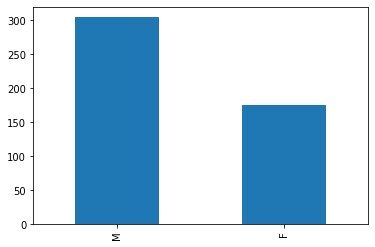

In [10]:
ax = students_raw.gender.value_counts()
ax.plot(kind='bar')

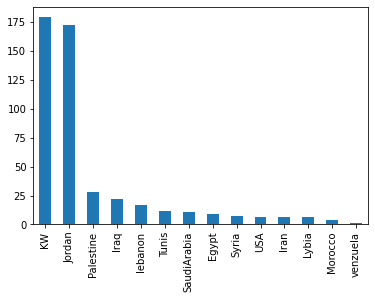

In [11]:
ax=students_raw.NationalITy.value_counts()
ax.plot(kind='bar')

The dataset consists of 305 males and 175 females.<br> The students come from different origins such as 179 students are from Kuwait, 172 students are from Jordan, 28 students from Palestine,22 students are from Iraq, 17 students from Lebanon, 12 students from Tunis, 11 students from Saudi Arabia, 9 students from Egypt, 7 students from Syria, 6 students from USA, Iran and Libya, 4 students from Morocco and one student from Venezuela.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


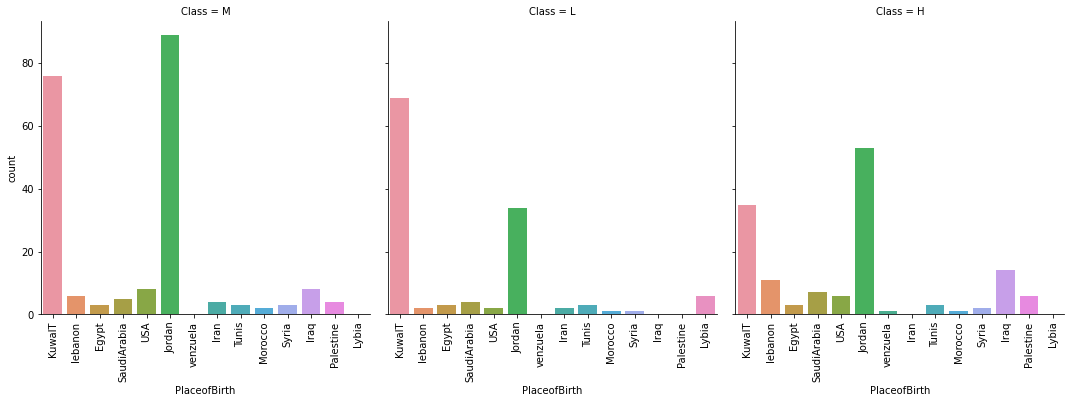

In [12]:
chart = sns.factorplot('PlaceofBirth', col = 'Class', data=students_raw, kind='count')
chart.set_xticklabels( rotation=90)

In [13]:
categorical = [var for var in students_raw.columns if students_raw[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 13 categorical variables

The categorical variables are : ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']


In [14]:
#To know the frequency of categorical variables
for var in categorical: 
    print(students_raw[var].value_counts())

M    305
F    175
Name: gender, dtype: int64
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64
MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64
G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64
A    283
B    167
C     30
Name: SectionID, dtype: int64
IT           95
French       65
Arabic       59
Science      51
E

##### **Identifying Relations**

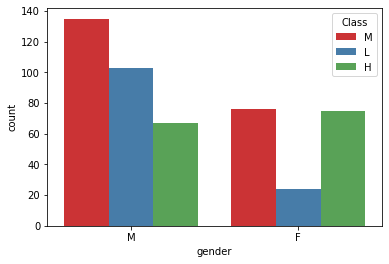

In [15]:
sns.countplot(data = students_raw,x='gender',hue='Class',palette='Set1')


Though the number of male students is greater than the female but the percentage of High-level students are less than female students. On the other hand, low-level students in the male are quite a lot greater than the female students.

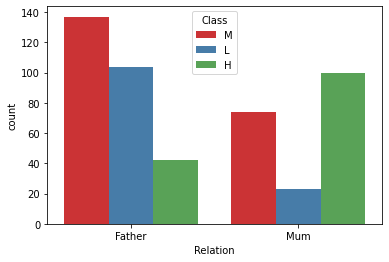

In [16]:
# relation between the grade of the student and parent responsible

sns.countplot(data=students_raw,x='Relation',hue='Class',palette='Set1');

It seems to have a relation with Mum has a very much positive impact on students performance

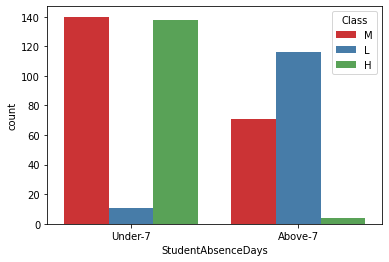

In [17]:
sns.countplot(data=students_raw,x='StudentAbsenceDays',hue='Class',palette='Set1');

The above picture clearly states that the student who is absent less than 7 days is mostly the successful one. It means students absence has a high impact on their overall performance.

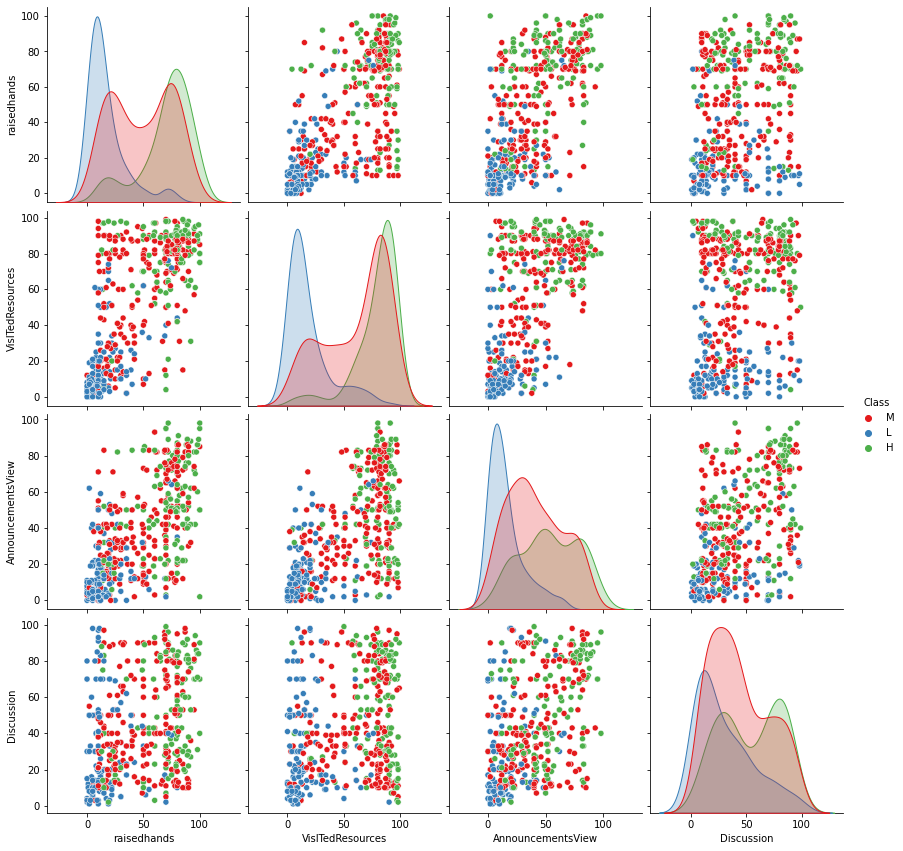

In [18]:
# Levels of participation rates across classes of students
# discussion group participation across classes

sns.pairplot(students_raw,hue='Class',palette='Set1',height=3);

Students that perform poorly rarely raise their hands, while students that perform okay have a greater variation of participation. Something to consider may be that the poorly performing students can not raise their hand because they are absent from class.<br>Both low and middle performing students do not go to the discussion groups very often.

In [19]:
fig = px.scatter_matrix(students_raw,dimensions=["AnnouncementsView","VisITedResources","raisedhands","Discussion"],color = 'GradeID',title = 'Student Data')
fig.update_layout(template='ggplot2')
fig.show()

**Generating the correlation matrix**

In [20]:
stud = pd.read_csv('/content/drive/MyDrive/sampledata/xAPI-Edu-Data.csv')

In [21]:
def cleanstage(x):
    if x=='lowerlevel' or x=='L':
        return 0
    elif x=="MiddleSchool"or x=='M':
        return 1
    else:
        return 2
stud.StageID = stud.StageID.apply(lambda y:cleanstage(y))
stud['gender'] = stud.gender.apply(lambda x: 0 if x=='M' else 1)
stud.ParentschoolSatisfaction = stud.ParentschoolSatisfaction.apply(lambda x: 1 if x=='Good' else 0)
stud.StudentAbsenceDays = stud.StudentAbsenceDays.apply(lambda x: 0 if x=="Under-7" else 1)
stud.Semester = stud.Semester.apply(lambda x: 0 if x=='F' else 1)# 0=F - 1=S
stud.GradeID = stud.GradeID.apply(lambda x: int(x[2:]))
stud.Relation = stud.Relation.apply(lambda x: 0 if x=='Father' else 1)
stud.ParentAnsweringSurvey = stud.ParentAnsweringSurvey.apply(lambda x: 1 if x=='Yes' else 0)
stud.Class = stud.Class.apply(lambda x:cleanstage(x))
stud

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,KW,KuwaIT,0,4,A,IT,0,0,15,16,2,20,1,1,0,1
1,0,KW,KuwaIT,0,4,A,IT,0,0,20,20,3,25,1,1,0,1
2,0,KW,KuwaIT,0,4,A,IT,0,0,10,7,0,30,0,0,1,0
3,0,KW,KuwaIT,0,4,A,IT,0,0,30,25,5,35,0,0,1,0
4,0,KW,KuwaIT,0,4,A,IT,0,0,40,50,12,50,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,Jordan,Jordan,1,8,A,Chemistry,1,0,5,4,5,8,0,0,1,0
476,1,Jordan,Jordan,1,8,A,Geology,0,0,50,77,14,28,0,0,0,1
477,1,Jordan,Jordan,1,8,A,Geology,1,0,55,74,25,29,0,0,0,1
478,1,Jordan,Jordan,1,8,A,History,0,0,30,17,14,57,0,0,1,0


In [22]:
corr = stud.corr()
corr.style.background_gradient(cmap='RdYlGn').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,gender,StageID,GradeID,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
gender,1.00,-0.02,-0.02,-0.05,0.20,0.15,0.21,0.05,0.12,0.02,0.09,-0.21,0.26
StageID,-0.02,1.00,0.95,0.03,-0.03,0.17,0.07,0.16,0.16,0.11,-0.01,-0.11,0.08
GradeID,-0.02,0.95,1.00,0.08,-0.03,0.19,0.08,0.20,0.18,0.12,-0.02,-0.08,0.07
Semester,-0.05,0.03,0.08,1.00,0.15,0.18,0.17,0.29,0.02,0.02,-0.03,-0.07,0.13
Relation,0.20,-0.03,-0.03,0.15,1.00,0.36,0.36,0.34,0.03,0.16,0.29,-0.22,0.40
raisedhands,0.15,0.17,0.19,0.18,0.36,1.00,0.69,0.64,0.34,0.32,0.30,-0.46,0.65
VisITedResources,0.21,0.07,0.08,0.17,0.36,0.69,1.00,0.59,0.24,0.38,0.36,-0.50,0.68
AnnouncementsView,0.05,0.16,0.20,0.29,0.34,0.64,0.59,1.00,0.42,0.40,0.30,-0.31,0.53
Discussion,0.12,0.16,0.18,0.02,0.03,0.34,0.24,0.42,1.00,0.23,0.06,-0.22,0.31
ParentAnsweringSurvey,0.02,0.11,0.12,0.02,0.16,0.32,0.38,0.40,0.23,1.00,0.54,-0.26,0.44


#### **SIMPLE LOGISTIC REGRESSION**

In [23]:
x = stud[['raisedhands']]
y = stud['Semester']
x = sm.add_constant(x)
model1 = sm.Logit(y, x, missing='drop')
res = model1.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.676896
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Semester   No. Observations:                  480
Model:                          Logit   Df Residuals:                      478
Method:                           MLE   Df Model:                            1
Date:                Sun, 13 Feb 2022   Pseudo R-squ.:                 0.02314
Time:                        05:01:19   Log-Likelihood:                -324.91
converged:                       True   LL-Null:                       -332.61
Covariance Type:            nonrobust   LLR p-value:                 8.733e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5946      0.170     -3.489      0.000      -0.929      -0.261
raisedhands     0.0118    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [24]:
y1 = res.predict(x)
prediction = list(map(round, y1))
print('Acutal values', list(y.values))
print('Predictions :', prediction)

Acutal values [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0

In [25]:
# confusion matrix
cm = confusion_matrix(y, prediction) 
print ("Confusion Matrix : \n", cm)  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y, prediction))

Confusion Matrix : 
 [[151  94]
 [103 132]]
Test accuracy =  0.5895833333333333


A simple logistic regression model with predictor variable : raised hands and dependent variable : semester.

#### **MULTIPLE LOGISTIC REGRESSION**

In [26]:
# Mutiple Logistic Regression

# Making a new dataframe consisting of attributes considered for the regression model.
stud_df = students_raw[["raisedhands", "VisITedResources", "Discussion", "ParentschoolSatisfaction"]]
stud_df["ParentschoolSatisfaction"] = stud_df.ParentschoolSatisfaction.apply(lambda x: 0 if x == "Bad" else 1)
print(stud_df)

# dividing the dataset into testing data(25%) and training data(75%)
X = stud_df[["raisedhands", "VisITedResources", "Discussion"]]
y = stud_df["ParentschoolSatisfaction"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# Fitting a logistic regression for the training data and predicting the values for the testing dataset
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred = logistic_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



     raisedhands  VisITedResources  Discussion  ParentschoolSatisfaction
0             15                16          20                         1
1             20                20          25                         1
2             10                 7          30                         0
3             30                25          35                         0
4             40                50          50                         0
..           ...               ...         ...                       ...
475            5                 4           8                         0
476           50                77          28                         0
477           55                74          29                         0
478           30                17          57                         0
479           35                14          62                         0

[480 rows x 4 columns]


In [27]:
print("Logistic regression coefficients: ", logistic_regression.coef_)
print("Logistic regression intercept: ",logistic_regression.intercept_)

Logistic regression coefficients:  [[ 0.00366796  0.02323692 -0.00346247]]
Logistic regression intercept:  [-0.88739625]


In [28]:
# 0 - bad, 1 - good
logistic_regression.classes_

array([0, 1])

In [29]:
# View of the testing data set to compare the actual vs predicted values
y_test_array = y_test.to_numpy()
result = X_test
result["Actual_Parent_school_satisfaction"] = y_test_array
result["Predicted_Parent_school_satisfaction"] = y_pred
result

,raisedhands,VisITedResources,Discussion,Actual_Parent_school_satisfaction,Predicted_Parent_school_satisfaction
15,30,40,66,1,0
124,0,6,15,0,0
141,19,65,10,0,1
263,49,94,7,0,1
170,40,62,33,1,1
...,...,...,...,...,...
463,69,77,92,1,1
198,27,15,53,0,0
155,70,58,91,0,1
221,80,51,24,1,1


In [30]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.65


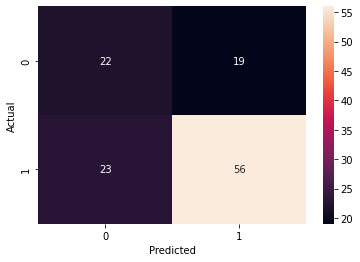

In [31]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

True positives(Good) = 56
<br>
False positives(Good) = 19
<br>
True negatives(Bad) = 22 
<br>
False negatives(Bad) = 23
<br>



Multiple logistic regression analysis applies when there is a single dichotomous outcome and more than one independent variable.<br>
The independent variables here are : 
*   RaisedHands
*   VisitedResources
*   Discussions
<br>

The dependent variable chosen is parent-school satisfaction.<br>The outcome in logistic regression analysis is coded as 0 or 1, where 1 indicates that parents are satisfied with the school(good) , and 0 indicates that disatisfaction with the school(bad).<br><br>
The coefficients derived from this model [ 0.00366796, 0.02323692, -0.00346247] indicate the change in the expected log odds relative to a one unit change in one independent variable, holding all other predictors constant. Therefore, the antilog of an estimated regression coefficient, exp(bi), produces an odds ratio.

(Odds(odds of success) is defined as probability of success/probability of failure.Log odds is the logarithm of the odds. )

The model has a 65% accuracy, the above confusion matrix explains the accuracy behind the model. Model accuracy is calculated:<br>
          (TP+TN)/ (TP + TN + FP + FN)

#### **MULTI-CLASS LOGISTIC REGRESSION**

In [32]:
students_df = pd.read_csv('/content/drive/MyDrive/sampledata/xAPI-Edu-Data.csv')

In [33]:
# Multi-class regression

# attributes: vistedresources and class

# Filtering the dataset so we can perform the regression
dataframe1 = students_df[["VisITedResources","Class"]]
dataframe1.insert(loc = 1, column = "one", value = 1)
dataframe1

,VisITedResources,one,Class
0,16,1,M
1,20,1,M
2,7,1,L
3,25,1,L
4,50,1,M
...,...,...,...
475,4,1,L
476,77,1,M
477,74,1,M
478,17,1,L


In [34]:
# Dividing the data into testing and training datasets
train, test = train_test_split(dataframe1, stratify = dataframe1["Class"], train_size = 0.65)
train.shape

(312, 3)

In [35]:
# viewing the sample of the training dataset
train.sample(8)

,VisITedResources,one,Class
28,85,1,M
145,75,1,M
59,22,1,M
447,84,1,M
12,1,1,L
393,90,1,H
5,30,1,M
272,21,1,M


In [36]:
#  fitting a model for the training dataset
lr = LogisticRegression()
lr.fit(train[["VisITedResources"]], train["Class"])

LogisticRegression()

In [37]:
# printing a sample of actual and predicted values in the test dataset
test.copy()
test["predicted"] = lr.predict(test[["VisITedResources"]])
test.sample(5)

,VisITedResources,one,Class,predicted
247,48,1,M,M
373,9,1,L,L
46,10,1,L,L
294,86,1,M,H
149,75,1,H,M


In [38]:
col_predict = lr.predict(test[["VisITedResources"]])
col_org = test["Class"]

# tesing the accuracy of predictions
acc = accuracy_score(col_org, col_predict)
print(acc)

0.5714285714285714


In [39]:
# the coefficients and intercept values obtained 
print("Regression coefficients: ", lr.coef_.T)
print("Intercept: ", lr.intercept_)

Regression coefficients:  [[ 0.04847897 -0.05174968  0.00327072]]
Intercept:  [-2.96125505  2.22709594  0.73415911]


In [40]:
# Each column represents logistic regression coefficients for one of the classes(L,M,H)
coef = np.vstack((lr.coef_.T, lr.intercept_))
coef

array([[ 0.04847897, -0.05174968,  0.00327072],
       [-2.96125505,  2.22709594,  0.73415911]])

In [41]:
view = test.iloc[:, :2]
view

,VisITedResources,one
102,6,1
288,70,1
119,60,1
53,70,1
277,31,1
...,...,...
383,83,1
130,9,1
50,14,1
430,89,1


In [42]:
#coef[:, :3]
# the different categories in the dependent variable
lr.classes_

array(['H', 'L', 'M'], dtype=object)

In [43]:
# scores for how likely a student will be classified as low, middle or high in each of the original rows(considering testing dataset)
scores  = test.iloc[:, :2]@ coef[:, :3] 
scores = scores.set_axis([c+"-score" for c in lr.classes_], axis = 1)
scores.head()

,H-score,L-score,M-score
102,-2.670381,1.916598,0.753783
288,0.432273,-1.395382,0.963109
119,-0.052517,-0.877885,0.930402
53,0.432273,-1.395382,0.963109
277,-1.458407,0.622856,0.835551


In [44]:
pd.concat((test, scores), axis = 1)

,VisITedResources,one,Class,predicted,H-score,L-score,M-score
102,6,1,L,L,-2.670381,1.916598,0.753783
288,70,1,M,M,0.432273,-1.395382,0.963109
119,60,1,M,M,-0.052517,-0.877885,0.930402
53,70,1,H,M,0.432273,-1.395382,0.963109
277,31,1,H,M,-1.458407,0.622856,0.835551
...,...,...,...,...,...,...,...
383,83,1,H,H,1.062499,-2.068128,1.005628
130,9,1,L,L,-2.524944,1.761349,0.763596
50,14,1,L,L,-2.282549,1.502600,0.779949
430,89,1,H,H,1.353373,-2.378626,1.025253


In [47]:
jaccard_score(test['Class'],test['predicted'],average=None)

array([0.33783784, 0.55737705, 0.35238095])

In multi-class classification problems we split the multi-class classification problem into multiple binary classification problems and fit a standard logistic regression model on each subproblem.
<br>
All the students are differentiated based on their scores and assigned either a low, middle or high class based on scores of the students. Due to this reason we have chosen 'Class' to be the dependent variable. The predictor variable chosen is 'visitedResources'.
<br>
We can see from above that there are three values obtained for both the coefficients and intercepts values as it has performed a logistic regression seperately for each of the categories(L,M,H).<br>The target is predicted from more than 2 possible outcomes.The predicition has been shown in the above table.


---------------------------------------------------------------------------